# Oakland Real Estate Assessment – Persimmon Inc. - Group 11
<br>
Cyrus Gill, Ale Ledesma, Quoc Tran, Thomas Micallef, Xijia Jiang

# Q1 to Q8 Spine
This notebook answers Questions 1–8 using an extended Oakland listings dataset with pre-computed features (HOLC, schools, amenities, employers, BART).


In [1]:
# 0. Setup & Load Data ----

library(tidyverse)
library(scales)
library(stargazer)


# Load extended CSV (with all your helper columns)
homes_df <- read_csv(
  "data/oakland_listings_extended.csv",
  name_repair = "universal",         # turns "SQUARE FEET" into SQUARE.FEET, etc.
  show_col_types = FALSE
)

# Count rows before filtering
num_rows <- nrow(homes_df)
print(paste("Number of rows before removing non-Oakland homes:", num_rows))

# Filter to Oakland + make sure key numeric fields are numeric
oakland_homes <- homes_df %>%
  filter(CITY == "Oakland") %>%
  mutate(
    PRICE       = as.numeric(PRICE),        # keep if you ever want the original
    price_num   = as.numeric(price_num),    # numeric sale price
    BEDS        = as.numeric(BEDS),
    BATHS       = as.numeric(BATHS),
    SQUARE.FEET = as.numeric(SQUARE.FEET),
    LOT.SIZE    = as.numeric(LOT.SIZE)
  )

num_rows <- nrow(oakland_homes)
print(paste("Number of rows after filtering out non-Oakland homes:", num_rows))


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PR

[1] "Number of rows before removing non-Oakland homes: 2237"
[1] "Number of rows after filtering out non-Oakland homes: 1956"


# Q1 – Price per Square Foot

**Question 1.** For each house, calculate the price per square foot. Report the average price per square foot in your selected city.


In [2]:
# Count the number of rows
num_rows <- nrow(homes_df)

# Print the result
print(paste("Number of rows before removing non-oakland homes:", num_rows))

# Filter for Oakland homes and calculate price per square foot
oakland_homes <- homes_df %>%
  filter(CITY == "Oakland") %>%
  mutate(price_per_sqft = PRICE / SQUARE.FEET)

# Count the number of rows
num_rows <- nrow(oakland_homes)

# Print the result
print(paste("Number of rows after filtering out non-oakland homes:", num_rows))

# Calculate the average price per square foot in Oakland
avg_price_per_sqft <- oakland_homes %>%
  summarise(avg_price_per_sqft = mean(price_per_sqft, na.rm = TRUE))

avg_price_per_sqft

[1] "Number of rows before removing non-oakland homes: 2237"
[1] "Number of rows after filtering out non-oakland homes: 1956"


avg_price_per_sqft
<dbl>
637.4231


Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”


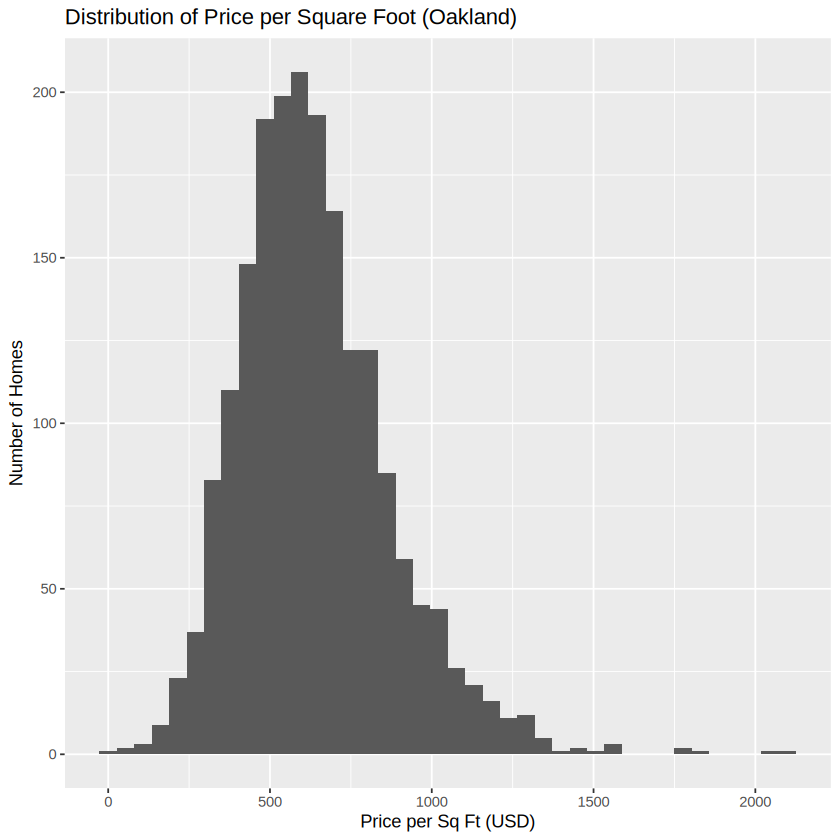

In [3]:
ggplot(oakland_homes, aes(x = price_per_sqft)) +
  geom_histogram(bins = 40) +
  labs(
    title = "Distribution of Price per Square Foot (Oakland)",
    x = "Price per Sq Ft (USD)",
    y = "Number of Homes"
  )


**Answer (Q1).**  
The average price per squarefoot in Oakland, California is $637.42


# Q2 – Simple Linear Regression: SALE PRICE ~ SQUARE FEET

**Question 2.** Run a simple linear regression:

SALE.PRICE = β₀ + β₁ × SQUARE.FEET + ε  

Interpret β₁ and its statistical significance.



Call:
lm(formula = price_num ~ SQUARE.FEET, data = oakland_homes)

Residuals:
     Min       1Q   Median       3Q      Max 
-3801447  -246827   -76955   187079  3800916 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.421e+05  2.053e+04   11.79   <2e-16 ***
SQUARE.FEET 4.820e+02  9.718e+00   49.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 493900 on 1948 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.5581,	Adjusted R-squared:  0.5578 
F-statistic:  2460 on 1 and 1948 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


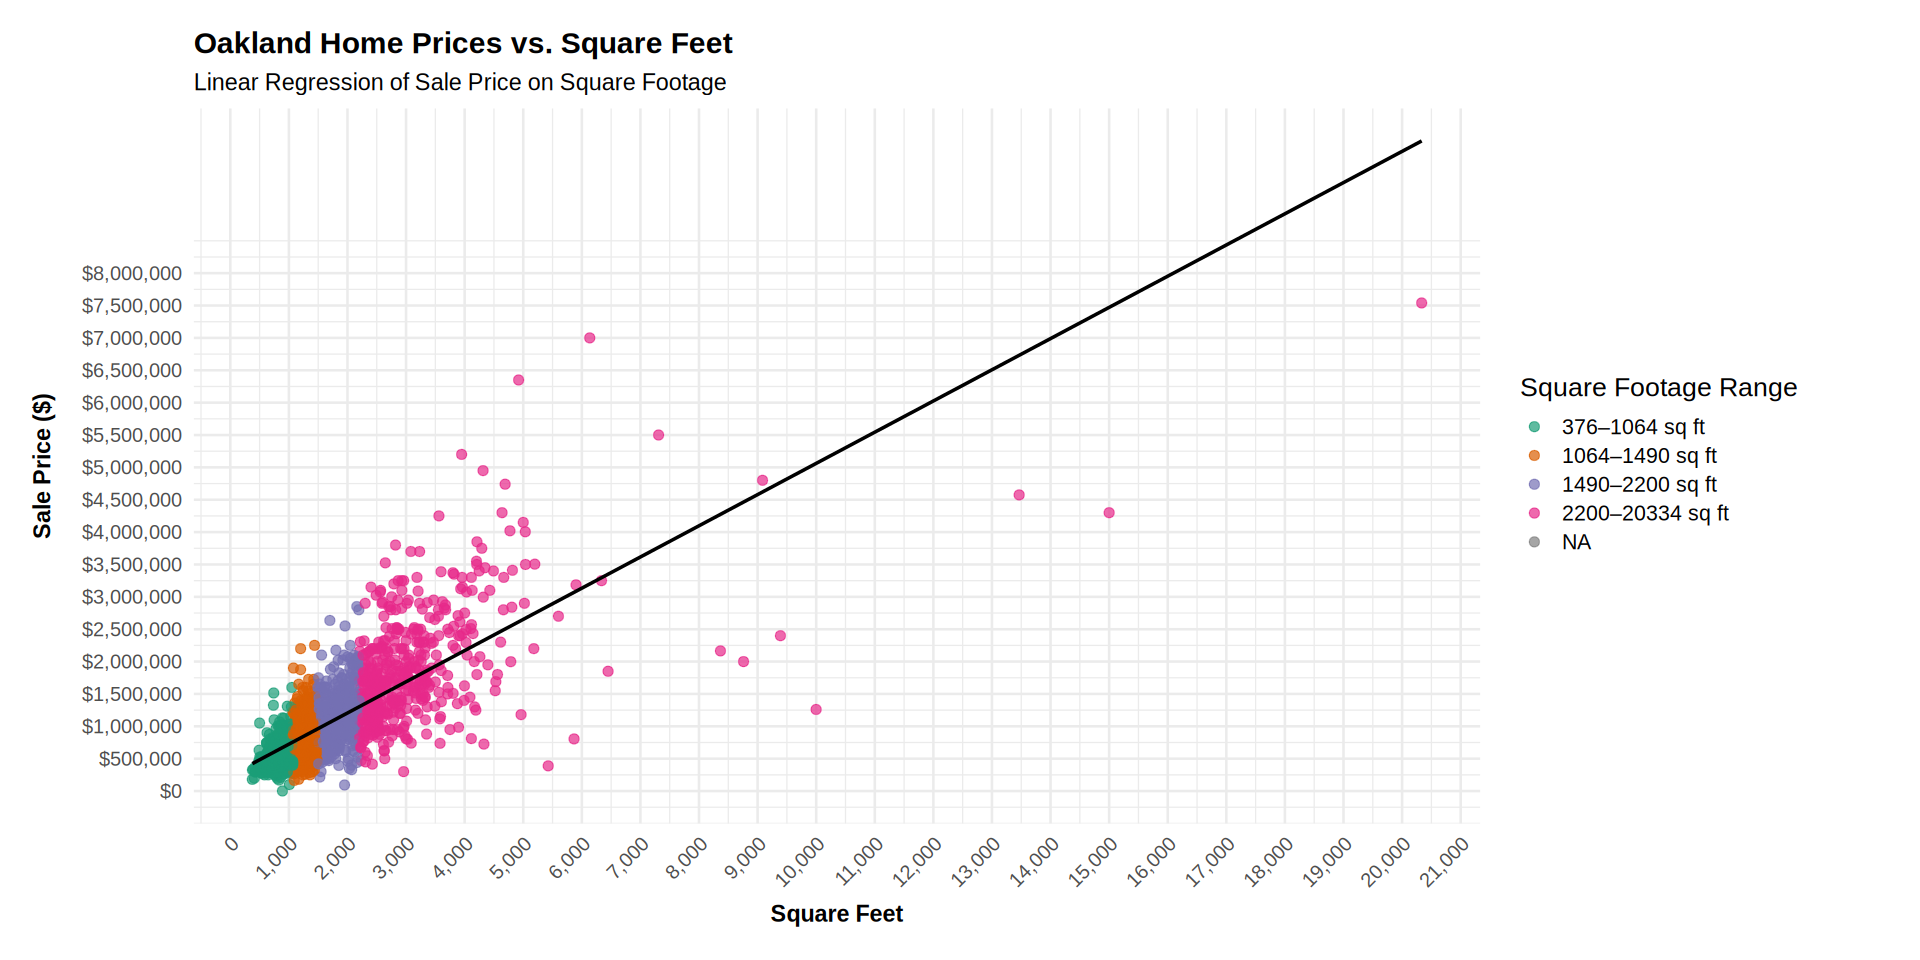

In [4]:
# Q2 – Simple Linear Regression: price_num ~ SQUARE.FEET ----

# Run linear regression
mod1 <- lm(price_num ~ SQUARE.FEET, data = oakland_homes)
summary(mod1)

# Create square footage range categories (quantile-based) for plotting
sqft_breaks <- quantile(
  oakland_homes$SQUARE.FEET,
  probs = seq(0, 1, by = 0.25),
  na.rm = TRUE
)

oakland_homes <- oakland_homes %>%
  mutate(
    SQFT_RANGE = cut(
      SQUARE.FEET,
      breaks = sqft_breaks,
      include.lowest = TRUE,
      labels = paste0(
        round(head(sqft_breaks, -1)), "–", round(tail(sqft_breaks, -1)), " sq ft"
      )
    )
  )

# Plot regression with improved readability
library(scales)

plot_oakland <- ggplot(oakland_homes, aes(x = SQUARE.FEET, y = price_num, color = SQFT_RANGE)) +
  geom_point(alpha = 0.7, size = 2.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linewidth = 1) +
  scale_x_continuous(
    breaks = seq(
      floor(min(oakland_homes$SQUARE.FEET, na.rm = TRUE) / 1000) * 1000,
      ceiling(max(oakland_homes$SQUARE.FEET, na.rm = TRUE) / 1000) * 1000,
      by = 1000
    ),
    labels = comma_format()
  ) +
  scale_y_continuous(
    labels = dollar_format(),
    breaks = seq(
      0,
      ceiling(max(oakland_homes$price_num, na.rm = TRUE) / 500000) * 500000,
      by = 500000
    )
  ) +
  scale_color_manual(
    values = c("#1b9e77", "#d95f02", "#7570b3", "#e7298a"),
    name = "Square Footage Range"
  ) +
  labs(
    title = "Oakland Home Prices vs. Square Feet",
    subtitle = "Linear Regression of Sale Price on Square Footage",
    x = "Square Feet",
    y = "Sale Price ($)"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    legend.position = "right",
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    plot.margin = margin(20, 40, 20, 20)
  ) +
  coord_cartesian(expand = TRUE)

options(repr.plot.width = 16, repr.plot.height = 8)
plot_oakland

# Optional: save for slides
ggsave("oakland_regression_plot_large.png", plot = plot_oakland,
       width = 18, height = 9, dpi = 300)



**Answer (Q2).**  

Our simple regression is:

> price_num = β₀ + β₁ × SQUARE.FEET + ε  

 
The regression results indicate a strong positive relationship between square footage and home price: for each additional square foot, the model predicts an average price increase of approximately $482, and the extremely small p-value (< 2.2e-16) confirms this effect is highly statistically significant. While the intercept of $242,100 represents the predicted price of a home with zero square feet—which is not meaningful in practice—it is required for the model’s calculations.


# Q3 – Regression with SQUARE.FEET, BEDS, and BATHS

**Question 3.** Run a regression model with the additional explanatory variables of BEDS and BATHS (in addition to SQUARE.FEET). Write out the regression equation. What do you notice about the additional coefficients and how existing coefficients change?


In [5]:
# Q3 – Regression with SQUARE.FEET, BEDS, and BATHS ----

# Make sure BEDS and BATHS are numeric (you already did this above, but harmless to repeat)
oakland_homes <- oakland_homes %>%
  mutate(
    BEDS  = suppressWarnings(as.numeric(BEDS)),
    BATHS = suppressWarnings(as.numeric(BATHS))
  )

# Run the extended regression
mod2 <- lm(price_num ~ SQUARE.FEET + BEDS + BATHS, data = oakland_homes)
summary(mod2)

# Compare R² for Mod1 vs Mod2
r2_compare <- tibble(
  model     = c("Mod1: SIZE only", "Mod2: SIZE + BEDS + BATHS"),
  r_squared = c(summary(mod1)$r.squared, summary(mod2)$r.squared)
)

r2_compare



Call:
lm(formula = price_num ~ SQUARE.FEET + BEDS + BATHS, data = oakland_homes)

Residuals:
     Min       1Q   Median       3Q      Max 
-4604662  -241386   -58958   180105  3393177 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 173059.40   25308.80   6.838 1.07e-11 ***
SQUARE.FEET    570.24      20.41  27.940  < 2e-16 ***
BEDS        -68163.10   12322.81  -5.531 3.61e-08 ***
BATHS        57892.00   17668.91   3.276  0.00107 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 471600 on 1934 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.5779,	Adjusted R-squared:  0.5772 
F-statistic: 882.5 on 3 and 1934 DF,  p-value: < 2.2e-16


model,r_squared
<chr>,<dbl>
Mod1: SIZE only,0.5580531
Mod2: SIZE + BEDS + BATHS,0.5778779


In [6]:
# Q3 – Stargazer comparison of Mod1 and Mod2 ----

stargazer(
  mod1, mod2,
  type = "text",          # "latex" or "html" if you want for slides/paper
  title = "Comparison of Simple and Extended Price Models",
  column.labels = c("Size Only", "Size + Beds + Baths"),
  dep.var.caption = "Dependent variable: Sale Price (price_num)",
  dep.var.labels = "",
  digits = 3,
  align = TRUE,
  omit.stat = c("f", "ser"),   # keep R^2, Adj R^2, N; drop F & residual SE if you want
  no.space = TRUE
)



Comparison of Simple and Extended Price Models
             Dependent variable: Sale Price (price 
             --------------------------------------
                                                   
                 Size Only      Size + Beds + Baths
                    (1)                 (2)        
---------------------------------------------------
SQUARE.FEET      481.978***         570.244***     
                  (9.718)            (20.409)      
BEDS                              -68,163.100***   
                                   (12,322.810)    
BATHS                              57,892.000***   
                                   (17,668.910)    
Constant       242,149.700***     173,059.400***   
                (20,534.490)       (25,308.800)    
---------------------------------------------------
Observations       1,950               1,938       
R2                 0.558               0.578       
Adjusted R2        0.558               0.577       
Note:           

**Answer (Q3).**  
The new regression is:

> price_num = β₀ + β₁ × SQUARE.FEET + β₂ × BEDS + β₃ × BATHS + ε  

- The coefficient on **BEDS** is about **-68,163**, and the coefficient on **BATHS** is about **57,892**. Both are statistically significant coefficients. 

  Holding square footage and number of bathrooms constant, adding an extra bedroom is associated with **lower** sale price.

  Holding square footage and number of bedrooms constant, adding an extra bathroom is associated with **higher** sale prices.
- The coefficient on **SQUARE.FEET** changes from about **β₁(mod1) = 482** in the simple model to **β₁(mod2) = 570** in the three-variable model.  
  This change occurs because some of what “size” was capturing before is now being explained more precisely by the bed and bath variables.
- The model’s R² increases from **R²₁ = 0.56** in Mod1 to **R²₂ = 0.58** in Mod2, so including BEDS and BATHS allows us to explain a larger share of the variation in Oakland home prices.

In words, once we control for how the interior space is divided into bedrooms and bathrooms, the pure effect of square footage adjusts, and the overall model fits the data better.  The stargazer table comparing Mod1 and Mod2 (above) summarizes these changes in coefficients and reports the increase in R² when we add BEDS and BATHS to the model.



# Q4 – Including LOT.SIZE for Non–Single-Family Homes

**Question 4.** If you are analyzing homes other than single family homes (e.g., condos, townhouses), what do you notice when you include LOT.SIZE in the regression?


In [7]:
# Q4 – LOT.SIZE for Non–Single-Family Homes ----

# Make sure key vars are numeric (safe to repeat)
oakland_homes <- oakland_homes %>%
  mutate(
    BEDS     = suppressWarnings(as.numeric(BEDS)),
    BATHS    = suppressWarnings(as.numeric(BATHS)),
    LOT.SIZE = suppressWarnings(as.numeric(LOT.SIZE))
  )

# Filter to non–single-family homes based on PROPERTY.TYPE
non_sfr <- oakland_homes %>%
  filter(!str_detect(PROPERTY.TYPE, regex("Single Family", ignore_case = TRUE))) %>%
  filter(!is.na(price_num),
         !is.na(SQUARE.FEET),
         !is.na(BEDS),
         !is.na(BATHS))

cat("Number of non–single-family homes:", nrow(non_sfr), "\n")

# Model on non-SFR without LOT.SIZE
mod2_non_sfr <- lm(price_num ~ SQUARE.FEET + BEDS + BATHS, data = non_sfr)

# Model on non-SFR with LOT.SIZE added
mod3 <- lm(price_num ~ SQUARE.FEET + BEDS + BATHS + LOT.SIZE, data = non_sfr)

summary(mod3)

# Compare R² on the SAME subset, with vs without LOT.SIZE
r2_q4 <- tibble(
  model     = c("Non-SFR: SIZE+BEDS+BATHS", "Non-SFR: +LOT.SIZE"),
  r_squared = c(summary(mod2_non_sfr)$r.squared, summary(mod3)$r.squared)
)

r2_q4

# Optional: stargazer comparison
stargazer(
  mod2_non_sfr, mod3,
  type = "text",
  title = "Non–Single-Family Homes: Effect of Adding LOT.SIZE",
  column.labels = c("No LOT.SIZE", "With LOT.SIZE"),
  dep.var.caption = "Dependent variable: Sale Price (price_num)",
  dep.var.labels = "",
  digits = 3,
  align = TRUE,
  omit.stat = c("f", "ser"),
  no.space = TRUE
)


Number of non–single-family homes: 619 



Call:
lm(formula = price_num ~ SQUARE.FEET + BEDS + BATHS + LOT.SIZE, 
    data = non_sfr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1188098  -162704   -30295   146459  1569372 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.468e+05  3.007e+04  14.861  < 2e-16 ***
SQUARE.FEET  5.435e+02  3.751e+01  14.489  < 2e-16 ***
BEDS        -1.497e+05  1.706e+04  -8.776  < 2e-16 ***
BATHS       -2.442e+03  2.520e+04  -0.097 0.922842    
LOT.SIZE    -1.515e+00  4.338e-01  -3.492 0.000531 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 266900 on 410 degrees of freedom
  (204 observations deleted due to missingness)
Multiple R-squared:  0.5892,	Adjusted R-squared:  0.5852 
F-statistic:   147 on 4 and 410 DF,  p-value: < 2.2e-16


model,r_squared
<chr>,<dbl>
Non-SFR: SIZE+BEDS+BATHS,0.5862009
Non-SFR: +LOT.SIZE,0.5891653



Non–Single-Family Homes: Effect of Adding LOT.SIZE
             Dependent variable: Sale Price (price 
             --------------------------------------
                                                   
                 No LOT.SIZE       With LOT.SIZE   
                     (1)                (2)        
---------------------------------------------------
SQUARE.FEET      528.431***          543.544***    
                  (29.318)            (37.514)     
BEDS           -126,245.700***    -149,709.700***  
                (14,328.080)        (17,058.870)   
BATHS             -239.845           -2,442.483    
                (19,675.730)        (25,202.570)   
LOT.SIZE                             -1.515***     
                                      (0.434)      
Constant       358,044.600***      446,802.100***  
                (21,897.830)        (30,065.670)   
---------------------------------------------------
Observations         619                415        
R2          

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET


--- Regression including LOT SIZE ---



Call:
lm(formula = PRICE ~ SQUARE.FEET + LOT.SIZE + PROPERTY.TYPE, 
    data = oakland_homes)

Residuals:
     Min       1Q   Median       3Q      Max 
-3944510  -267238   -60572   216120  3641437 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             5.473e+03  5.032e+04   0.109   0.9134
SQUARE.FEET                             4.907e+02  1.060e+01  46.278  < 2e-16
LOT.SIZE                                1.715e+00  8.139e-01   2.107   0.0353
PROPERTY.TYPEMulti-Family (2-4 Unit)   -1.263e+05  1.337e+05  -0.944   0.3451
PROPERTY.TYPEMulti-Family (5+ Unit)    -2.191e+06  3.049e+05  -7.187  9.8e-13
PROPERTY.TYPEOther                     -8.950e+05  5.019e+05  -1.783   0.0747
PROPERTY.TYPESingle Family Residential  2.749e+05  4.852e+04   5.667  1.7e-08
PROPERTY.TYPETownhouse                  1.211e+05  5.675e+04   2.133   0.0330
                                          
(Intercept)                              

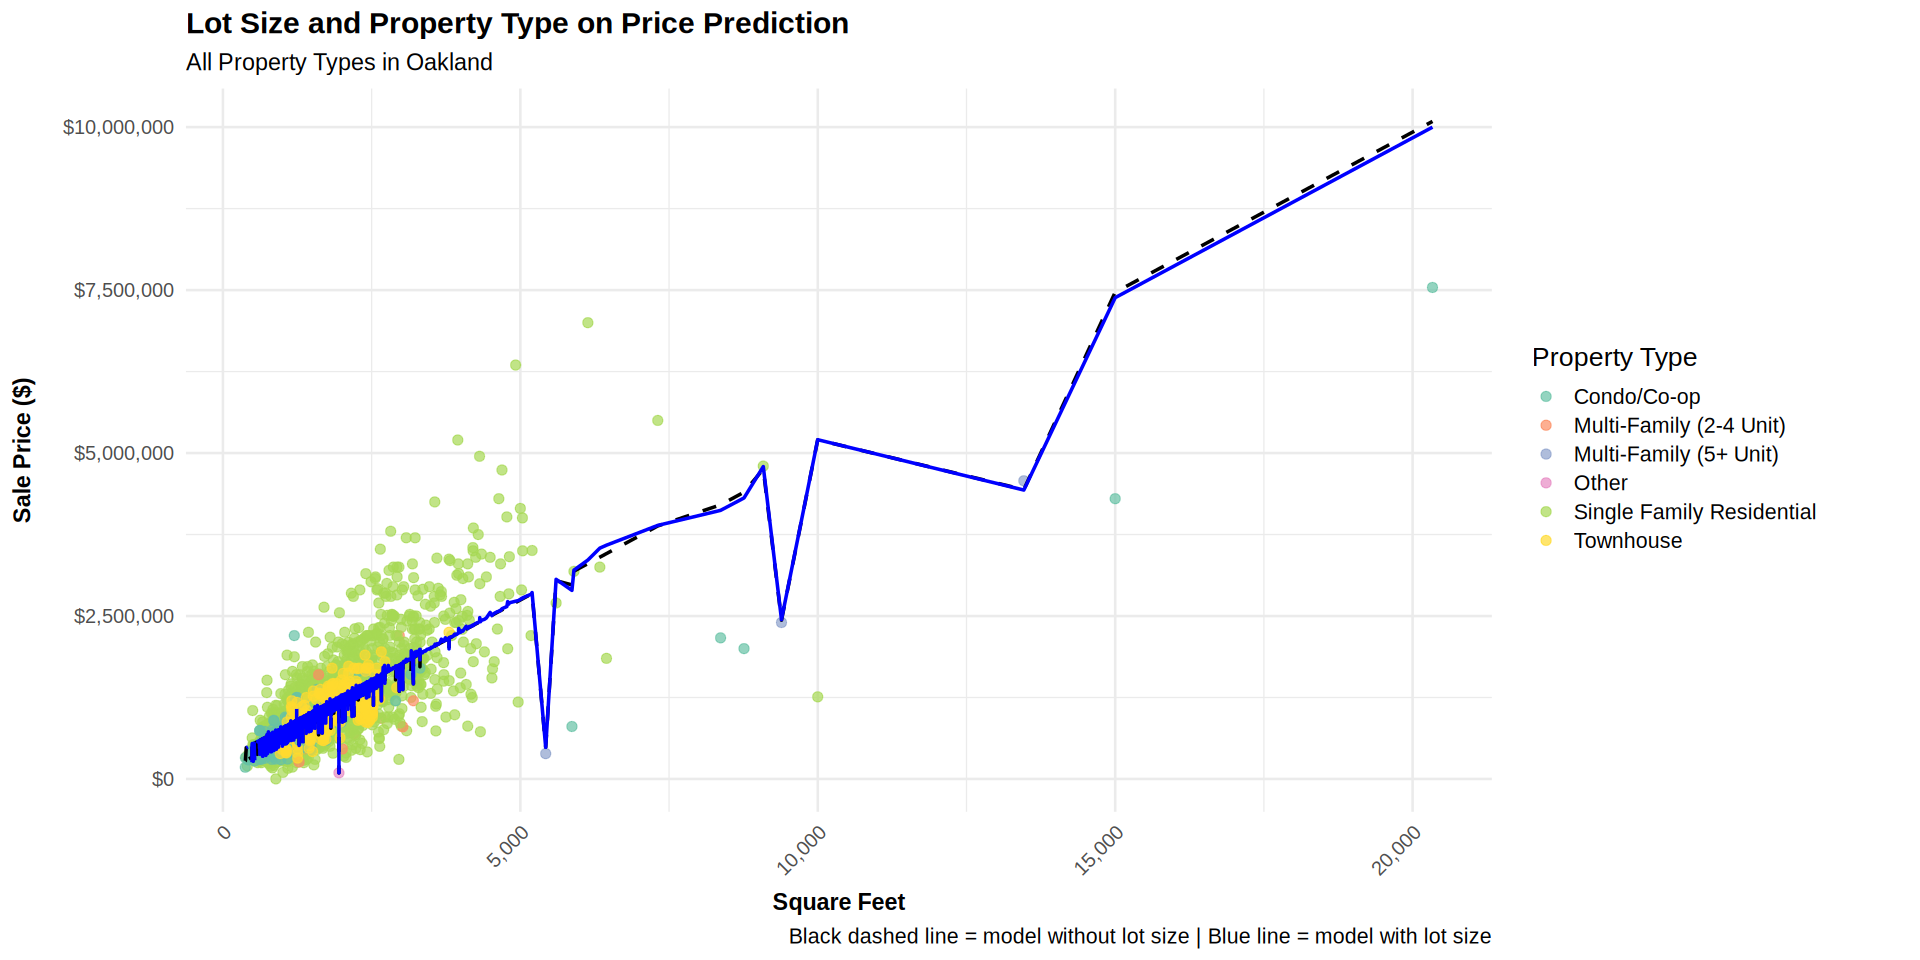

In [1]:
# Load libraries
library(tidyverse)
library(scales)

# Load and clean data
homes_df <- read_csv("data/oaklandredfin_v2.csv", name_repair = 'universal')

oakland_homes <- homes_df %>%
  filter(CITY == "Oakland") %>%
  mutate(
    PRICE = as.numeric(PRICE),
    SQUARE.FEET = as.numeric(SQUARE.FEET),
    LOT.SIZE = as.numeric(LOT.SIZE),
    PROPERTY.TYPE = as.factor(PROPERTY.TYPE)
  ) %>%
  filter(!is.na(PRICE) & PRICE > 0 & !is.na(SQUARE.FEET))

# ----------------------------------------------------------
# 1️⃣ Run regressions: without and with lot size
# ----------------------------------------------------------
model_no_lot <- lm(PRICE ~ SQUARE.FEET + PROPERTY.TYPE, data = oakland_homes)
model_with_lot <- lm(PRICE ~ SQUARE.FEET + LOT.SIZE + PROPERTY.TYPE, data = oakland_homes)

# cat("\n--- Regression without LOT SIZE ---\n")
# summary(model_no_lot)
cat("\n--- Regression including LOT SIZE ---\n")
summary(model_with_lot)

# ----------------------------------------------------------
# 2️⃣ Create fitted values for plotting comparison
# ----------------------------------------------------------
oakland_homes <- oakland_homes %>%
  mutate(
    fitted_no_lot = predict(model_no_lot, newdata = oakland_homes),
    fitted_with_lot = predict(model_with_lot, newdata = oakland_homes)
  )

# ----------------------------------------------------------
# 3️⃣ Plot: Price vs. Square Feet, colored by Property Type
# ----------------------------------------------------------
plot_oakland <- ggplot(oakland_homes, aes(x = SQUARE.FEET, y = PRICE)) +
  geom_point(aes(color = PROPERTY.TYPE), alpha = 0.7, size = 2.5) +
  geom_line(aes(y = fitted_no_lot), color = "black", linewidth = 1, linetype = "dashed") +
  geom_line(aes(y = fitted_with_lot), color = "blue", linewidth = 1) +
  scale_color_brewer(palette = "Set2", name = "Property Type") +
  scale_x_continuous(labels = comma_format()) +
  scale_y_continuous(labels = dollar_format()) +
  labs(
    title = "Lot Size and Property Type on Price Prediction",
    subtitle = "All Property Types in Oakland",
    x = "Square Feet",
    y = "Sale Price ($)",
    caption = "Black dashed line = model without lot size | Blue line = model with lot size"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    legend.position = "right",
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14)
  )

# Display
options(repr.plot.width = 16, repr.plot.height = 8)
plot_oakland

# Save if desired
ggsave("oakland_regression_lotsize_propertytype_effect.png",
       plot = plot_oakland, width = 18, height = 9, dpi = 300)

**Answer (Q4).**  
For non–single-family homes (condos, townhomes, etc.), we estimate two models on the same subset:

1. **Model A (Non-SFR: SIZE + BEDS + BATHS):**  
   price_num = β₀ + β₁ × SQUARE.FEET + β₂ × BEDS + β₃ × BATHS + ε  

2. **Model B (Non-SFR: SIZE + BEDS + BATHS + LOT.SIZE):**  
   price_num = β₀ + β₁ × SQUARE.FEET + β₂ × BEDS + β₃ × BATHS + β₄ × LOT.SIZE + ε  

From the “With LOT.SIZE” model:

- The coefficient on **LOT.SIZE** is about **–1.52** with p < 0.01.  
  Holding interior square footage, bedrooms, and bathrooms constant, each additional square foot of lot area is associated with roughly **\$1.50 lower** sale price. This suggests that, for condos and townhomes, larger “lot size” (often shared/common space or larger complexes) is not something buyers directly pay a premium for and may even be correlated with lower-price, higher-density developments.
- The coefficients on **SQUARE.FEET**, **BEDS**, and **BATHS** are broadly similar across the two models, so adding LOT.SIZE does not fundamentally change how interior characteristics relate to price.

In terms of model fit:

- **R²** without LOT.SIZE is about **0.586**, and **0.589** with LOT.SIZE.  
  The increase in R² is extremely small, so LOT.SIZE adds very little explanatory power for non–single-family homes in this sample.

Overall, for condos/townhomes, including LOT.SIZE does **not** materially improve the model and its coefficient is small, negative, and only marginally meaningful compared to interior features.



# Q5 – Fraction of Variation Explained (R²)

**Question 5.** What fraction of the variation in home prices is explained by your selected variables? How does your model change with the addition of other variables?


In [9]:
library(tidyverse)
library(forcats)

oakland_ext <- read_csv(
  "data/oakland_listings_extended.csv",
  name_repair = "universal",
  show_col_types = FALSE
) %>%
  filter(CITY == "Oakland") %>%
  mutate(
    price_num   = as.numeric(price_num),
    BEDS        = suppressWarnings(as.numeric(BEDS)),
    BATHS       = suppressWarnings(as.numeric(BATHS)),
    SQUARE.FEET = suppressWarnings(as.numeric(SQUARE.FEET)),
    LOT.SIZE    = suppressWarnings(as.numeric(LOT.SIZE)),
    
    ZIP_chr    = as.character(`ZIP.OR.POSTAL.CODE`),
    zip_factor = factor(ZIP_chr),
    zip_factor = forcats::fct_relevel(zip_factor, "94609"),
    
    # sale_year should already be in your extended CSV
    sale_year      = as.integer(sale_year),
    sale_year_fe   = factor(sale_year)   # year fixed effects
  ) %>%
  filter(
    !is.na(price_num),
    !is.na(SQUARE.FEET),
    !is.na(sale_year_fe)
  )


New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET` -> `DAYS.ON.MARKET`
• `$/SQUARE FEET` -> `..SQUARE.FEET`
• `HOA/MONTH` -> `HOA.MONTH`
• `NEXT OPEN HOUSE START TIME` -> `NEXT.OPEN.HOUSE.START.TIME`
• `NEXT OPEN HOUSE END TIME` -> `NEXT.OPEN.HOUSE.END.TIME`
• `URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR
  INFO ON PRICING)` ->
  `URL..SEE.https...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.`
• `MLS#` -> `MLS.`


In [10]:
# Model 1: Size only
mod1_q5 <- lm(price_num ~ SQUARE.FEET, data = oakland_ext)

# Model 2: Size + Beds & Baths
mod2_q5 <- lm(price_num ~ SQUARE.FEET + BEDS + BATHS, data = oakland_ext)

# Extended model: structure + HOLC dummies + amenities + ZIP + SALE YEAR FE
mod_extended_q5 <- lm(
  price_num ~ 
    SQUARE.FEET + BEDS + BATHS +
    is_HOLC_A + is_HOLC_B + is_HOLC_D +         # HOLC_C is baseline
    within_0_5_mile_quality_school +
    distance_to_bart_miles +
    dist_to_employer_pixar_miles +
    dist_to_employer_downtown_miles  +
    dist_to_employer_industrial_miles +
    dist_to_employer_college_miles +
    dist_to_grocery_miles +
    dist_to_retail_dining_miles +
    dist_to_shopping_center_miles +
    dist_to_hiking_miles +
    dist_to_waterfront_miles +
    zip_factor +                                # ZIP 94609 baseline
    sale_year_fe,                               # year fixed effects
  data = oakland_ext
)

summary(mod_extended_q5)



Call:
lm(formula = price_num ~ SQUARE.FEET + BEDS + BATHS + is_HOLC_A + 
    is_HOLC_B + is_HOLC_D + within_0_5_mile_quality_school + 
    distance_to_bart_miles + dist_to_employer_pixar_miles + dist_to_employer_downtown_miles + 
    dist_to_employer_industrial_miles + dist_to_employer_college_miles + 
    dist_to_grocery_miles + dist_to_retail_dining_miles + dist_to_shopping_center_miles + 
    dist_to_hiking_miles + dist_to_waterfront_miles + zip_factor + 
    sale_year_fe, data = oakland_ext)

Residuals:
     Min       1Q   Median       3Q      Max 
-2989523  -182256    -9625   163769  3077364 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -532629.8   247789.9  -2.150 0.031744 *  
SQUARE.FEET                           526.9       19.4  27.156  < 2e-16 ***
BEDS                               -26424.5    11744.2  -2.250 0.024585 *  
BATHS                               15433.0    16104.7   0.958 0.338062    

In [11]:
r2_q5 <- tibble(
  model = c("Mod1: Size only",
            "Mod2: +Beds & Baths",
            "ModExtended: +HOLC, amenities, employers, ZIP, year FE"),
  r_squared = c(
    summary(mod1_q5)$r.squared,
    summary(mod2_q5)$r.squared,
    summary(mod_extended_q5)$r.squared
  )
)

r2_q5


model,r_squared
<chr>,<dbl>
Mod1: Size only,0.5949776
Mod2: +Beds & Baths,0.6286911
"ModExtended: +HOLC, amenities, employers, ZIP, year FE",0.7676187


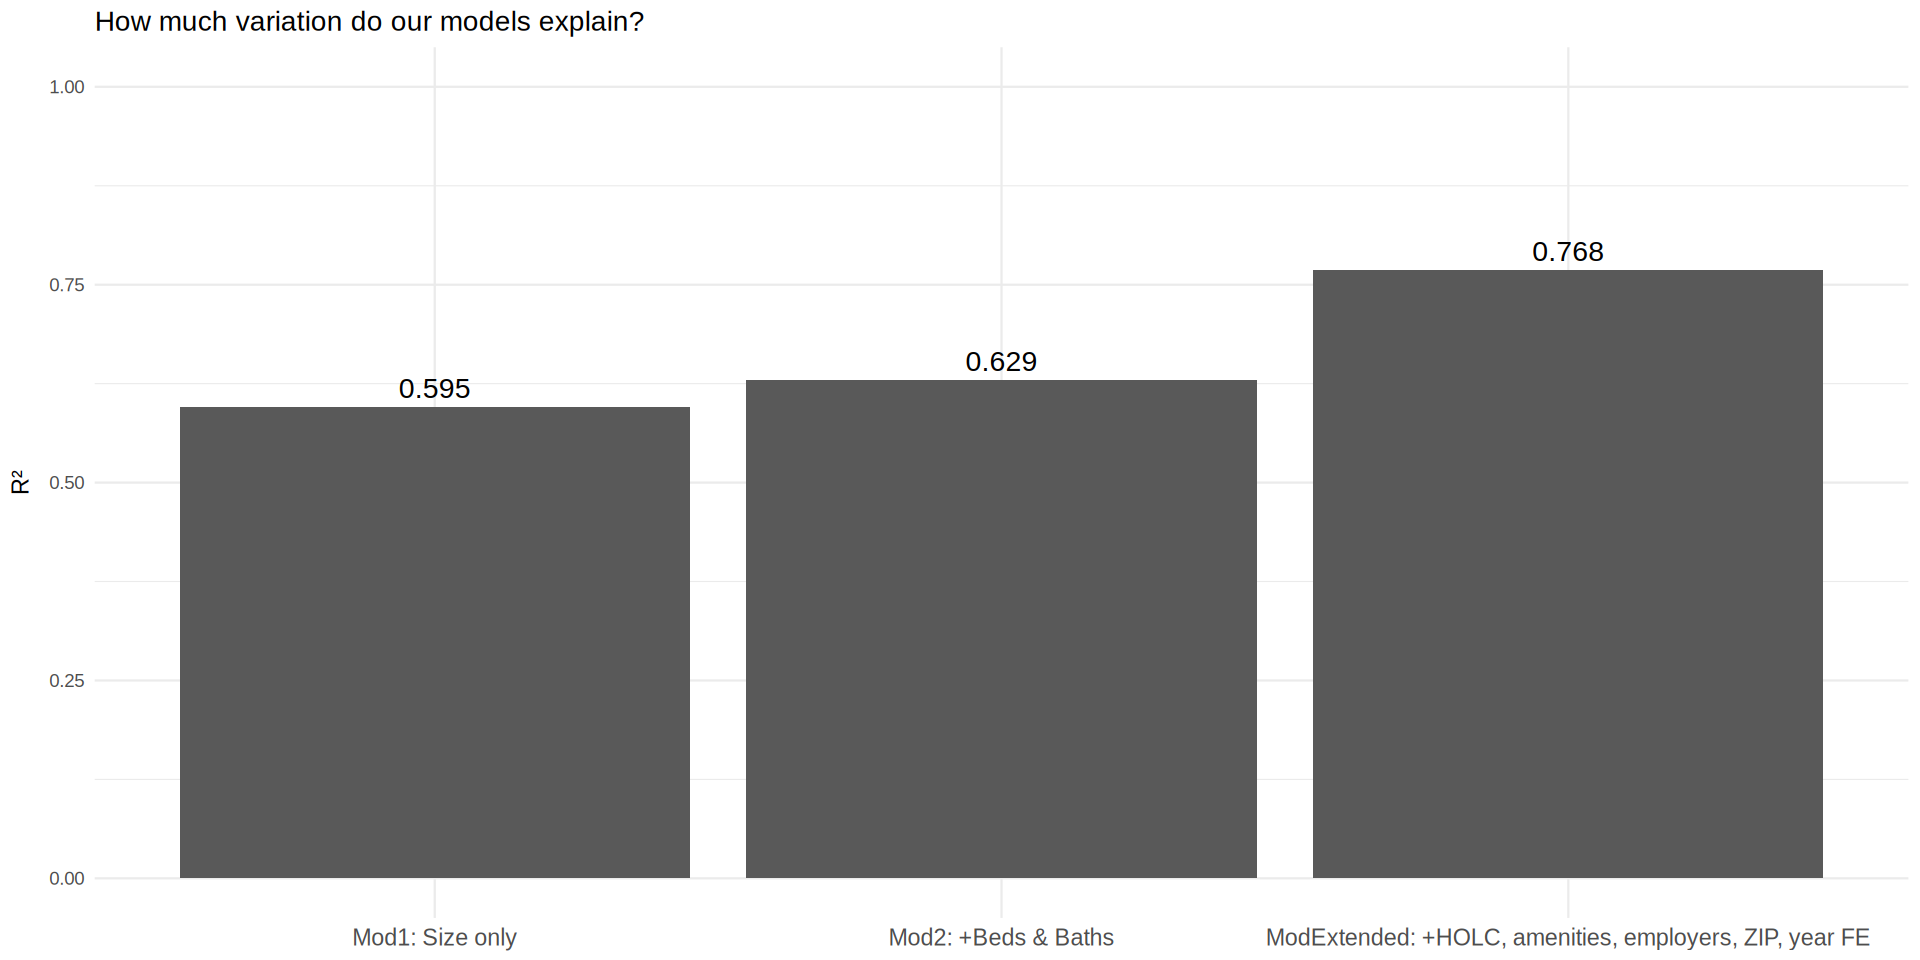

In [12]:
library(ggplot2)

r2_q5_pretty <- r2_q5 %>%
  mutate(
    model = factor(model, levels = model),
    r_squared = round(r_squared, 3)
  )

ggplot(r2_q5_pretty, aes(x = model, y = r_squared)) +
  geom_col() +
  geom_text(
    aes(label = r_squared),
    vjust = -0.5,
    size = 6          # 👈 increase this (5–7 usually looks good)
  ) +
  ylim(0, 1) +
  labs(
    x = NULL,
    y = "R²",
    title = "How much variation do our models explain?"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(size = 14)
  )


**Answer (Q5).** 

**Model 1 – Size only**

Model:

> price_num = β₀ + β₁ · SQUARE.FEET + ε

- R² ≈ **0.595** (about **59%** of the variation in prices).
- Interpretation: interior square footage alone explains a little under two-thirds of the variation in Oakland sale prices.

---

**Model 2 – Size + Beds & Baths**

Model:

> price_num = β₀ + β₁ · SQUARE.FEET + β₂ · BEDS + β₃ · BATHS + ε

- R² ≈ **0.629** (about **63%** of the variation in prices).
- Interpretation: adding BEDS and BATHS modestly increases R² from 0.595 to 0.629, so the way square footage is divided into bedrooms/bathrooms provides some additional explanatory power beyond size alone.

---

**Extended Oakland model – Size + HOLC + schools + transit + employers + amenities + ZIP + year FE**

Model (schematic form):

> price_num = size + beds/baths  
> &nbsp;&nbsp;&nbsp;&nbsp;+ HOLC dummies (A, B, D; C is the baseline)  
> &nbsp;&nbsp;&nbsp;&nbsp;+ within_0_5_mile_quality_school  
> &nbsp;&nbsp;&nbsp;&nbsp;+ distances to BART, Pixar, downtown employers, industrial employers, colleges  
> &nbsp;&nbsp;&nbsp;&nbsp;+ distances to grocery, retail/dining, shopping, hiking, waterfront  
> &nbsp;&nbsp;&nbsp;&nbsp;+ ZIP fixed effects (baseline 94609)  
> &nbsp;&nbsp;&nbsp;&nbsp;+ sale_year fixed effects  
> &nbsp;&nbsp;&nbsp;&nbsp;+ error term

- R² ≈ **0.768** (Adjusted R² ≈ **0.762**), so this model explains about **77%** of the variation in sale prices.

A few key patterns from the extended model:

- **Size effect:** each additional square foot is associated with about **\$525 higher** price; an extra 100 sq ft adds roughly **\$50k+**, holding other factors constant.
- **HOLC:** homes in **HOLC B** areas sell for about **\$80k more** than similar homes in **HOLC C** areas; A and D are not statistically different from C once we control for location and amenities.
- **Schools:** being **within 0.5 miles of a quality school** is associated with roughly **\$120k higher** sale price.
- **Employers & industry:** homes **closer to Pixar/Emeryville** are more expensive, while expensive single-family homes tend to be **farther from downtown job centers and industrial employers**, consistent with a hills-vs-central vb/port divide.
- **Amenities & waterfront:** being closer to **grocery, retail/dining, and the waterfront** is strongly associated with higher prices.

Overall, moving from the simple size-only model (R² ≈ 0.595) to the Oakland-specific extended model (R² ≈ 0.768) shows that **location, historic grading, schools, job geography, and amenities collectively explain a much larger fraction of price variation** than home size alone.



# Q6. Use your model to predict a typical home price
 
Use your model to predict a typical home price. For example, what is the predicted sale price of a 2-bedroom, 2-bath home with 1,500 square feet (or for a typical home in your chosen area)? What is the 95% confidence interval for your prediction?  

Because the question only specifies square footage, bedrooms, and bathrooms (and does not provide ZIP code, HOLC grade, distances to amenities, or year), we used **Model 2 (Size + Beds & Baths)** as our prediction model for Q6. Our extended Oakland model from Q5 requires many additional location inputs that are not defined here.



In [13]:
# --- Q6: Predict price for a 2-bed, 2-bath, 1,500 sq ft home ---

# Make sure mod2_q5 is already defined as:
# mod2_q5 <- lm(price_num ~ SQUARE.FEET + BEDS + BATHS, data = oakland_ext)

# Define the "typical" home
new_home <- tibble(
  SQUARE.FEET = 1500,
  BEDS        = 2,
  BATHS       = 2
)

# 95% confidence interval for the mean predicted price
pred_ci <- predict(
  mod2_q5,
  newdata  = new_home,
  interval = "confidence",
  level    = 0.95
)

pred_ci

# Optional: 95% prediction interval for an individual home
pred_pi <- predict(
  mod2_q5,
  newdata  = new_home,
  interval = "prediction",
  level    = 0.95
)

pred_pi


,fit,lwr,upr
1,1020826,991179.9,1050471


,fit,lwr,upr
1,1020826,157913.6,1883738


**Answer (Q6).**

We use **Model 2**, which takes the form:

> price_num = β₀ + β₁ · SQUARE.FEET + β₂ · BEDS + β₃ · BATHS + ε

We consider a **2-bedroom, 2-bath home with 1,500 square feet**:

- SQUARE.FEET = 1,500  
- BEDS = 2  
- BATHS = 2  

Using `predict(mod2_q5, newdata = ..., interval = "confidence")` in R, we obtain:

- **Predicted sale price (point estimate)**:  
  ≈ **\$1,020,826**

- **95% confidence interval for the *average* price** of 2-bed, 2-bath, 1,500 sq ft homes:  
  ≈ **[\$991,180, \$1,050,471]**

Confidence interval:  
If we repeatedly sampled Oakland homes and re-estimated this model many times, about 95% of the confidence intervals constructed this way would contain the *true average sale price* of 2-bed, 2-bath, 1,500 sq ft homes.




In [2]:
### Q7. How might you use your model to identify investment opportunities?

**Question (Q7).**  
How might you use your model to identify investment opportunities in the current housing market in your city?

---

**Answer (Q7).**

Our extended Oakland model (from Q5) predicts sale price based on:

- home structure (square feet, beds, baths),
- historic HOLC grade,
- proximity to quality schools,
- distances to BART, job centers (Pixar/Emeryville, downtown, colleges, industrial areas),
- distances to amenities (grocery, retail/dining, shopping, hiking, waterfront),
- ZIP code, and
- sale year.

We can use this model to flag **potential investment opportunities** by comparing each home’s **actual price** to the **price implied by its fundamentals**.

---

#### 1. Compute predicted price and residuals

First, we use the extended model to compute a predicted price for every listing and then calculate the residual:

- **Predicted price** = what the model thinks the home “should” be worth, given its size, location, HOLC grade, amenities, etc.
- **Residual** = actual price − predicted price

Homes with **large negative residuals** are selling for **less than expected**, conditional on their fundamentals.

(Example R code in the notebook:)

```r
oakland_ext <- oakland_ext %>%
  mutate(
    pred_price = predict(mod_extended_q5, newdata = oakland_ext),
    residual   = price_num - pred_price
  )


ERROR: Error in parse(text = input): <text>:3:1: unexpected '^'
2: 
3: **
   ^


### Q7. How might you use your model to identify investment opportunities?

**Question (Q7).**  
How might you use your model to identify investment opportunities in the current housing market in your city?



**Answer (Q7).**

Our extended Oakland model (from Q5) predicts sale price based on:

- home structure (square feet, beds, baths),
- historic HOLC grade,
- proximity to quality schools,
- distances to BART, job centers (Pixar/Emeryville, downtown, colleges, industrial areas),
- distances to amenities (grocery, retail/dining, shopping, hiking, waterfront),
- ZIP code, and
- sale year.

We can use this model to flag **potential investment opportunities** by comparing each home’s **actual price** to the **price implied by its fundamentals**.

---
#### 1. Fit the extended Oakland model on recent sales.

#### 2. Compute predicted prices and residuals for current listings.

#### 3. Filter to homes with large negative residuals and good fundamentals (schools, amenities, distance from heavy industry, etc.).

#### 4. Use that short list as the starting point for deeper financial and on-the-ground due diligence

### Q8. Additional variables and extended Oakland models

**Question (Q8).**  
Based on your knowledge of the city, what other variable(s) would you include to better predict residential home prices? Go ahead and collect the data for (a small sample of) your homes. Interpret your additional results and use them appropriately. You can also consider different models or model specifications. Argue for the importance of your additional analysis for identifying investment opportunities. Be creative!

---

**Answer (Q8).**

The original Redfin file only included basic structure and location variables (square feet, beds, baths, ZIP, etc.). Based on what we know about Oakland, we extended the data with several city-specific features and re-estimated our model.

The key additional variables we created were:

- **Historic HOLC grade**  
  Using digitized HOLC maps, we assigned each home a grade (A–D) and created dummies for A, B, and D (C is baseline).  
  In our extended model, homes in **HOLC B** areas sell for about **\$80k more** than similar homes in **HOLC C** areas, holding size, amenities, ZIP, and year fixed. A and D are not statistically different from C once we control for everything else.  
  This captures how the legacy of redlining still shows up in prices, but not in a simple “D is always low” way.

- **School quality access**  
  Using California Dashboard data and school locations, we flagged homes that are **within 0.5 miles of a quality school**.  
  Being within 0.5 miles of a quality school is associated with roughly **\$120k higher** sale price, all else equal.  
  This reflects strong family demand and is especially important for investors targeting long-run appreciation and stable rentals.

- **Job geography** (different types of employers)  
  We computed distances to several types of job centers:
  - `dist_to_employer_pixar_miles` (Pixar/Emeryville),
  - `dist_to_employer_downtown_miles` (Kaiser, PG&E, downtown CBD),
  - `dist_to_employer_industrial_miles` (port/industrial areas),
  - `dist_to_employer_college_miles` (UC Berkeley, Merritt, etc.).
  
  The model finds that:
  - Being **closer to Pixar/Emeryville** is associated with higher prices (1 mile closer is worth roughly \$300k).
  - The priciest SFRs are **farther from downtown and industrial areas**, reflecting a “hills vs CBD/port” pattern.
  - The most expensive family-oriented homes are not necessarily right next to big campuses.

- **Amenities and waterfront access**  
  We also added distances to **grocery, retail/dining, shopping centers, hiking, and the waterfront**.  
  Being closer to grocery and retail/dining is associated with roughly **\$180–200k higher** prices, and being closer to the **waterfront** carries an even larger premium (around **\$380k per mile**).  
  These variables quantify the value of walkable daily amenities and views.

Incorporating these Oakland-specific variables raises the model’s R² from about **0.63** (size + beds + baths) to about **0.77** in our extended specification. More importantly, it makes the model much more useful for **investors**:

- We can now distinguish between homes that are cheap because they are in low-amenity, industrial-adjacent areas, versus homes that are cheap **despite** having good schools, amenities, and job access.
- By looking at the residuals from the extended model (actual price minus predicted price), we can flag homes that appear **undervalued given their HOLC grade, school access, job geography, and amenities** (see Q7).

Overall, the additional variables turn local knowledge about Oakland—redlining history, schools, job centers, and amenities—into measurable features that both improve prediction and help identify neighborhoods and properties with **strong fundamentals but relatively low current prices.**



In [ ]:
library(broom)
library(tidyverse)
library(scales)

# Tidy extended model with confidence intervals
tidy_ext <- tidy(mod_extended_q5, conf.int = TRUE)

# Pick the "Oakland-specific" variables to show
vars_of_interest <- c(
  "is_HOLC_B",
  "within_0_5_mile_quality_school",
  "dist_to_employer_pixar_miles",
  "dist_to_employer_downtown_miles",
  "dist_to_employer_industrial_miles",
  "dist_to_employer_college_miles",
  "dist_to_grocery_miles",
  "dist_to_retail_dining_miles",
  "dist_to_waterfront_miles"
)

plot_df <- tidy_ext %>%
  filter(term %in% vars_of_interest) %>%
  mutate(
    pretty_label = recode(term,
      "is_HOLC_B"                      = "HOLC B vs C",
      "within_0_5_mile_quality_school" = "Within 0.5 mi of quality school",
      "dist_to_employer_pixar_miles"   = "Distance to Pixar (mi)",
      "dist_to_employer_downtown_miles"= "Distance to downtown employers (mi)",
      "dist_to_employer_industrial_miles" = "Distance to industrial employers (mi)",
      "dist_to_employer_college_miles" = "Distance to colleges (mi)",
      "dist_to_grocery_miles"          = "Distance to grocery (mi)",
      "dist_to_retail_dining_miles"    = "Distance to retail & dining (mi)",
      "dist_to_waterfront_miles"       = "Distance to waterfront (mi)"
    ),
    pretty_label = factor(pretty_label, levels = rev(unique(pretty_label)))
  )

ggplot(plot_df, aes(x = estimate, y = pretty_label)) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "grey60") +
  geom_point(size = 3) +
  geom_errorbarh(aes(xmin = conf.low, xmax = conf.high), height = 0.15) +
  scale_x_continuous(labels = dollar) +
  labs(
    title = "Estimated effects of Oakland-specific variables on price",
    x = "Change in sale price (USD)",
    y = NULL,
    caption = "Model controls for size, beds, baths, ZIP, and sale year."
  ) +
  theme_minimal(base_size = 14)


### Q8. Appendix

As a robustness check, we also estimated a LASSO version of the extended model. 
When we penalize and shrink weaker effects toward zero, the variables that consistently survive are:

- square footage,
- HOLC B/D vs C,
- being within 0.5 miles of a quality school,
- distance to grocery stores,
- distance from industrial employers,
- and a small subset of year effects.

This confirms that our main story is driven by a relatively small set of factors: 
home size, school quality, historic grading, and access to everyday amenities and non-industrial locations.



In [ ]:
library(glmnet)
library(tidyverse)

# 1) Define the formula once
form_lasso <- price_num ~ 
  SQUARE.FEET + BEDS + BATHS +
  is_HOLC_A + is_HOLC_B + is_HOLC_D +         # HOLC_C is baseline
  within_0_5_mile_quality_school +
  distance_to_bart_miles +
  dist_to_employer_pixar_miles +
  dist_to_employer_downtown_miles  +
  dist_to_employer_industrial_miles +
  dist_to_employer_college_miles +
  dist_to_grocery_miles +
  dist_to_retail_dining_miles +
  dist_to_shopping_center_miles +
  dist_to_hiking_miles +
  dist_to_waterfront_miles +                                # ZIP 94609 baseline
  sale_year_fe                                # year fixed effects

# 2) Build a model.frame that automatically drops rows with NAs
mf_lasso <- model.frame(form_lasso, data = oakland_ext, na.action = na.omit)

# 3) Design matrix X and response y from the SAME rows
X <- model.matrix(form_lasso, data = mf_lasso)[, -1]  # drop intercept column
y <- model.response(mf_lasso)

dim(X)  # sanity check
length(y)

# 4) Cross-validated LASSO
set.seed(123)

cv_fit <- cv.glmnet(
  x = X,
  y = y,
  alpha = 1,        # LASSO
  nfolds = 10,
  standardize = TRUE,
  family = "gaussian"
)

plot(cv_fit)

lambda_min <- cv_fit$lambda.min
lambda_1se <- cv_fit$lambda.1se

lambda_min
lambda_1se

# 5) See which variables survive at lambda.1se (sparser)
coef_1se <- coef(cv_fit, s = "lambda.1se")

lasso_coefs <- tibble(
  term     = rownames(coef_1se),
  estimate = as.numeric(coef_1se)
) %>%
  filter(estimate != 0) %>%
  arrange(desc(abs(estimate)))

lasso_coefs



New names:
• `SALE TYPE` -> `SALE.TYPE`
• `SOLD DATE` -> `SOLD.DATE`
• `PROPERTY TYPE` -> `PROPERTY.TYPE`
• `STATE OR PROVINCE` -> `STATE.OR.PROVINCE`
• `ZIP OR POSTAL CODE` -> `ZIP.OR.POSTAL.CODE`
• `SQUARE FEET` -> `SQUARE.FEET`
• `LOT SIZE` -> `LOT.SIZE`
• `YEAR BUILT` -> `YEAR.BUILT`
• `DAYS ON MARKET` -> `DAYS.ON.MARKET`
• `$/SQUARE FEET` -> `..SQUARE.FEET`
• `HOA/MONTH` -> `HOA.MONTH`
• `NEXT OPEN HOUSE START TIME` -> `NEXT.OPEN.HOUSE.START.TIME`
• `NEXT OPEN HOUSE END TIME` -> `NEXT.OPEN.HOUSE.END.TIME`
• `URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR
  INFO ON PRICING)` ->
  `URL..SEE.https...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.`
• `MLS#` -> `MLS.`
Rows: 2237 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALE.TYPE, SOLD.DATE, PROPERTY.TYPE, ADDRESS, CITY, STATE.OR.PROVI...
dbl (11): ZIP.OR.POSTAL.CODE, PRICE, BEDS, BATHS, SQUARE.FEET, LOT.SI


Call:
lm(formula = PRICE ~ YEAR.BUILT, data = oakland_homes)

Residuals:
     Min       1Q   Median       3Q      Max 
-1066774  -502779  -221178   264944  6422706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -798470.1   932016.9  -0.857   0.3917  
YEAR.BUILT      971.0      476.9   2.036   0.0419 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 744000 on 1941 degrees of freedom
Multiple R-squared:  0.002131,	Adjusted R-squared:  0.001617 
F-statistic: 4.145 on 1 and 1941 DF,  p-value: 0.04189


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


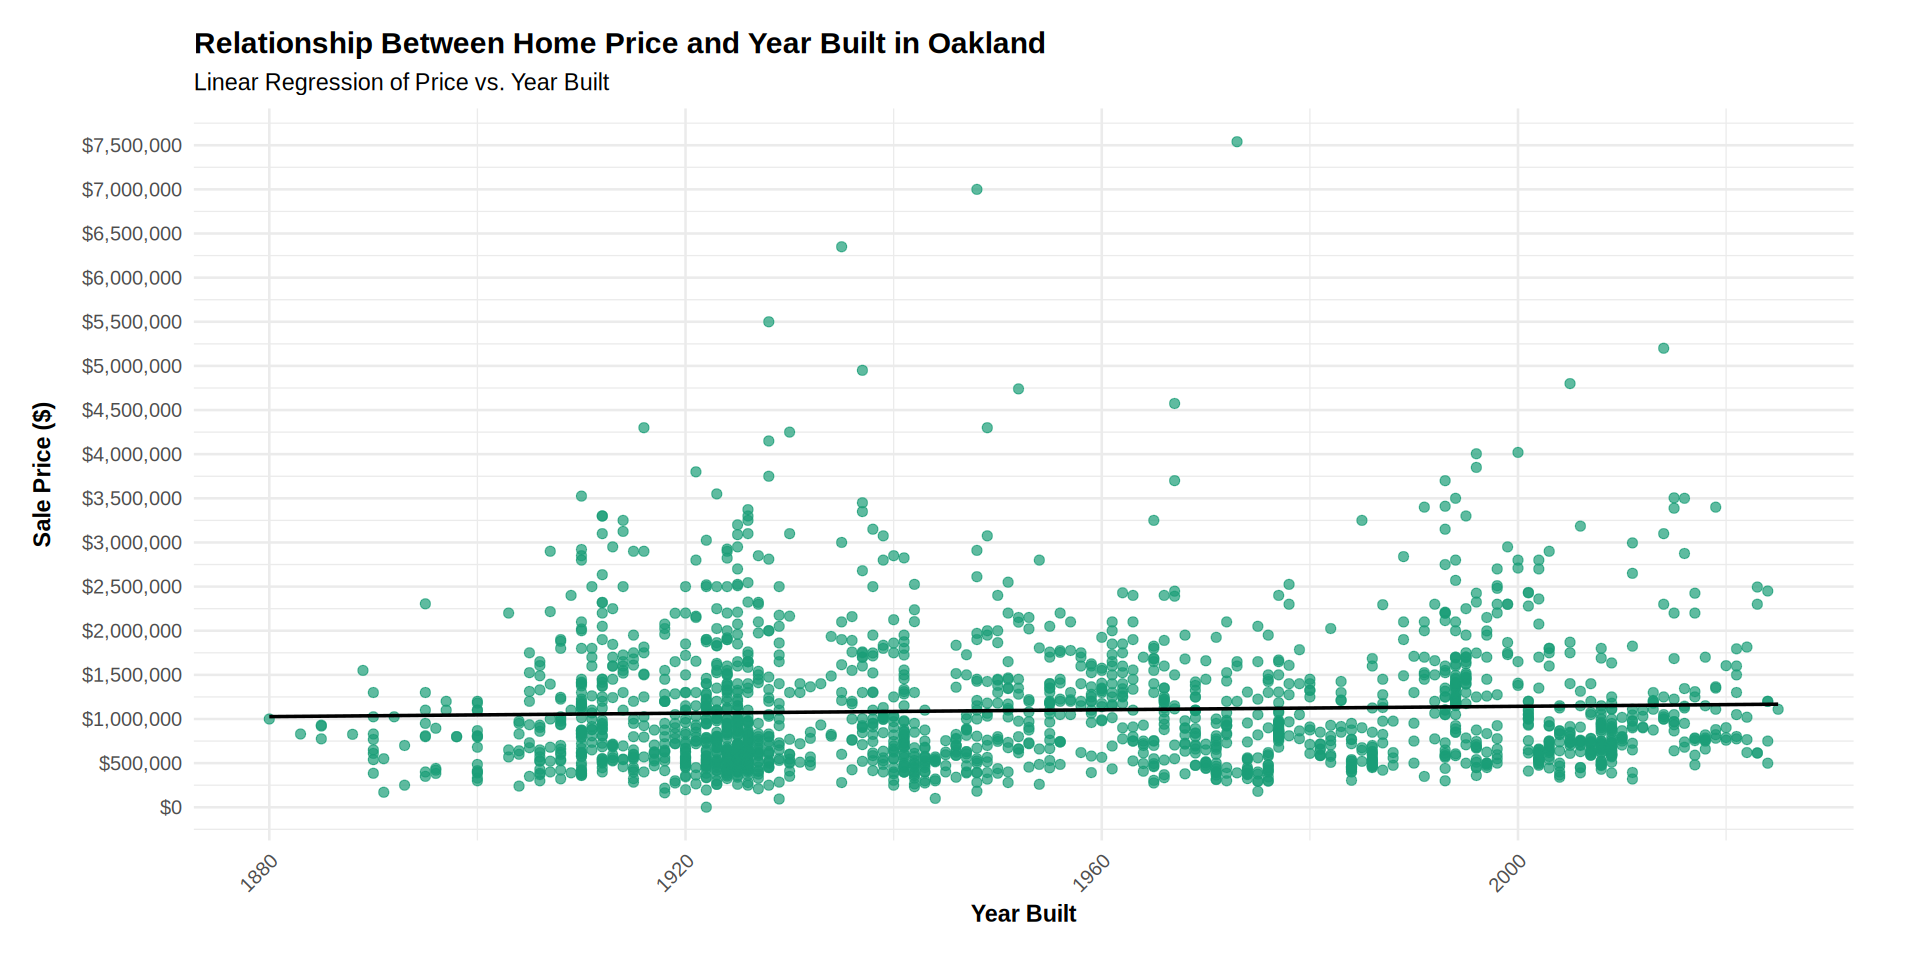

In [3]:
# Load libraries
library(tidyverse)
library(scales)

# Load and clean data
homes_df <- read_csv("data/oaklandredfin_v2.csv", name_repair = 'universal')

oakland_homes <- homes_df %>%
  filter(CITY == "Oakland") %>%
  mutate(
    PRICE = as.numeric(PRICE),
    YEAR.BUILT = as.numeric(YEAR.BUILT)
  ) %>%
  filter(!is.na(PRICE) & PRICE > 0 & !is.na(YEAR.BUILT))

# Run linear regression: Price vs. Year Built
model_year <- lm(PRICE ~ YEAR.BUILT, data = oakland_homes)
summary(model_year)

# Plot regression line
plot_year <- ggplot(oakland_homes, aes(x = YEAR.BUILT, y = PRICE)) +
  geom_point(alpha = 0.7, color = "#1b9e77", size = 2.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linewidth = 1) +
  scale_y_continuous(
    labels = dollar_format(),
    breaks = seq(
      0,
      ceiling(max(oakland_homes$PRICE, na.rm = TRUE) / 500000) * 500000,
      by = 500000
    )
  ) +
  labs(
    title = "Relationship Between Home Price and Year Built in Oakland",
    subtitle = "Linear Regression of Price vs. Year Built",
    x = "Year Built",
    y = "Sale Price ($)"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    plot.margin = margin(20, 40, 20, 20)
  ) +
  coord_cartesian(expand = TRUE)

# Display the plot
options(repr.plot.width = 16, repr.plot.height = 8)
plot_year

# (Optional) Save the plot
ggsave("oakland_price_vs_yearbuilt.png", plot = plot_year, width = 18, height = 9, dpi = 300)
